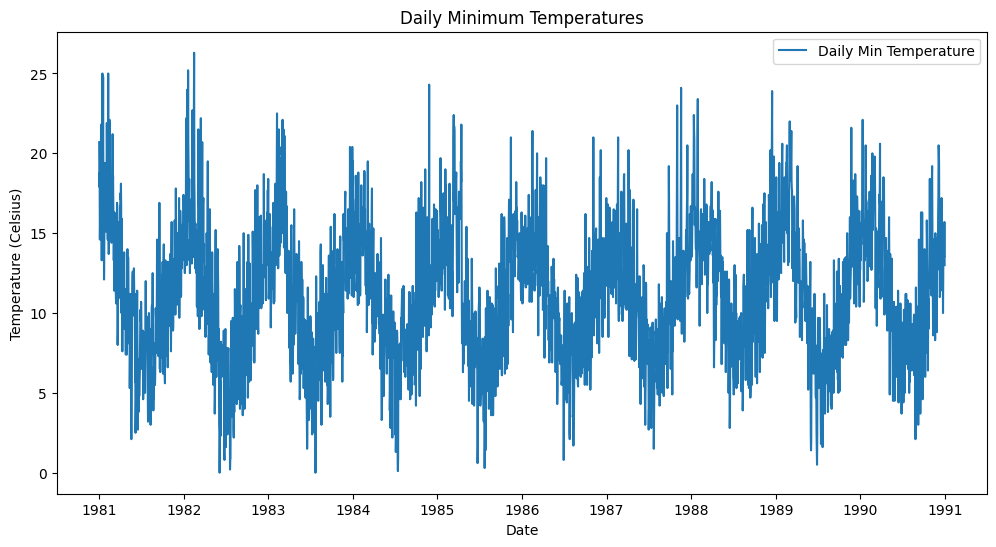

c:\Users\Tanvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Tanvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Tanvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Squared Error: 21.16046032694508


c:\Users\Tanvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Tanvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


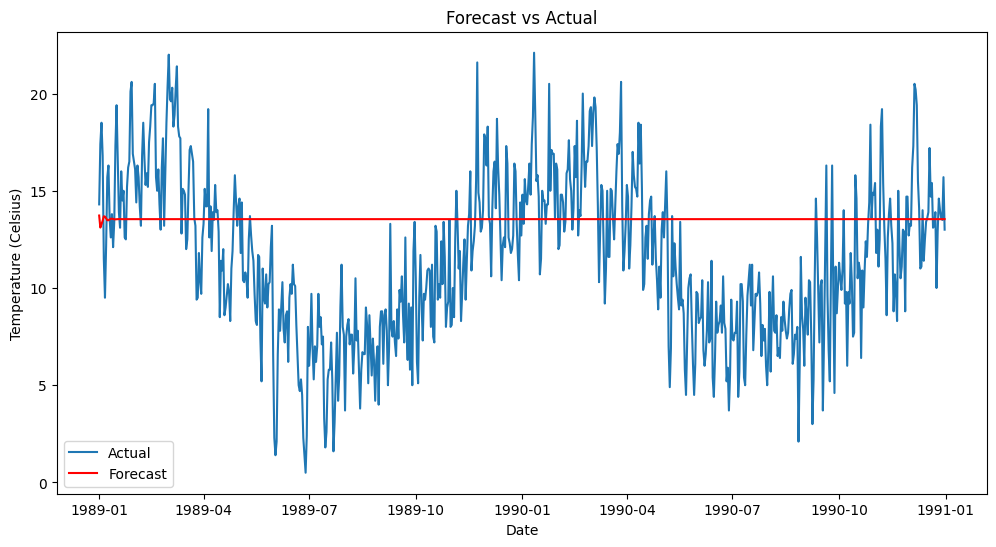

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
data = pd.read_csv(url, parse_dates=['Date'], index_col='Date')

# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data, label='Daily Min Temperature')
plt.title('Daily Minimum Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

# Train-Test Split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Build ARIMA Model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test)).values


# Evaluate the Model
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error: {mse}")

# Plot Forecast vs Actual
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()
